In [5]:
import tensorflow as tf
print(tf.__version__)

2.3.0


### Introduction

Use CNN to categorize images into 10 classes. Use data from CIFAR-10 (https://www.cs.toronto.edu/~kriz/cifar.html). 
Consists 60,000 32x32 color images and 6,000 images of each class.
Run on Colab environment.

###Load data

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

%matplotlib inline

In [7]:
from keras.datasets import cifar10

In [8]:
(X_train, y_train),(X_test,y_test)=cifar10.load_data()

###Visualize data

In [9]:
X_train.shape

(50000, 32, 32, 3)

In [10]:
y_train.shape

(50000, 1)

In [11]:
X_test.shape

(10000, 32, 32, 3)

In [12]:
y_test.shape

(10000, 1)

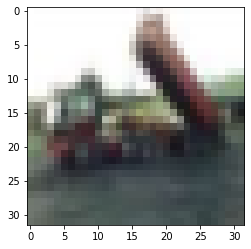

In [13]:
plt.imshow(X_train[2])

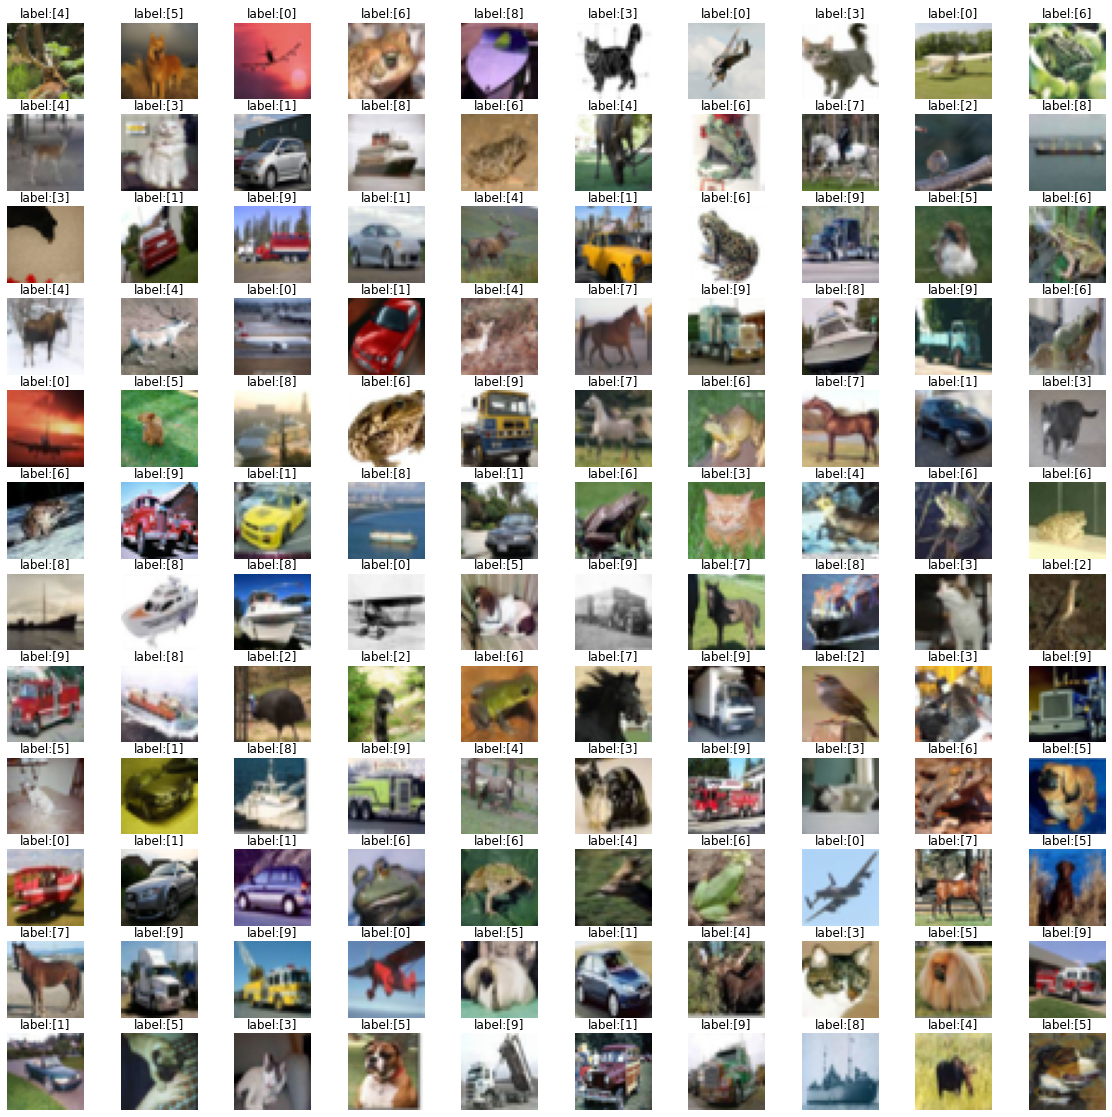

In [14]:
# show several images at the same time

width=12
length=10

# create grids
fig,ax=plt.subplots(width, length, figsize=(20,20))

# flatten array for grids
ax=ax.ravel()

#number of images in training data
num_img=len(X_train)


# for each position in the grids, place/show a training image randomly there
for i in np.arange(0, width*length):
  img_index=np.random.randint(0,num_img)
  ax[i].imshow(X_train[img_index])
  ax[i].axis('off')
  ax[i].set_title("label:{}".format(y_train[img_index]))



###Preprocess: data clean, normalize, one-hot encoding


In [15]:
# turn y_train and y_test into one-hot encoding, for 10 classes

from keras import utils

y_train = utils.to_categorical(y_train, num_classes=10, dtype='float32')
y_test = utils.to_categorical(y_test, num_classes=10, dtype='float32')

In [16]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [17]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [18]:
# normalize X_train and X_test data so that value ranges from 0 to 1


X_train= X_train/255.0
X_test= X_test/255.0

In [19]:
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [20]:
X_test.shape

(10000, 32, 32, 3)

In [21]:
X_train.shape

(50000, 32, 32, 3)

### Define model, train

In [22]:
tf.keras.backend.clear_session()

from keras.models import Sequential
from keras import layers


In [23]:
model=Sequential()
model.add(layers.Conv2D(filters=64,kernel_size=(3,3), activation='elu', padding="same",input_shape=(32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation='elu',padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='elu',padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          1

In [24]:
model.compile(optimizer = 'adam',loss='categorical_crossentropy', metrics=['accuracy'] )

In [32]:
epochs=100

In [25]:

history= model.fit(X_train, y_train, batch_size=64, epochs=epochs, shuffle=True, validation_data=(X_test, y_test))

Epoch 1/100
782/782 [==============================] - 6s 7ms/step - loss: 1.4486 - accuracy: 0.4790 - val_loss: 1.1748 - val_accuracy: 0.5805
Epoch 2/100
782/782 [==============================] - 5s 7ms/step - loss: 1.1055 - accuracy: 0.6055 - val_loss: 1.2055 - val_accuracy: 0.5937
Epoch 3/100
782/782 [==============================] - 5s 7ms/step - loss: 0.9579 - accuracy: 0.6589 - val_loss: 0.9865 - val_accuracy: 0.6530
Epoch 4/100
782/782 [==============================] - 5s 7ms/step - loss: 0.8597 - accuracy: 0.6948 - val_loss: 1.3206 - val_accuracy: 0.5425
Epoch 5/100
782/782 [==============================] - 5s 7ms/step - loss: 0.8022 - accuracy: 0.7145 - val_loss: 0.8710 - val_accuracy: 0.6968
Epoch 6/100
782/782 [==============================] - 5s 7ms/step - loss: 0.7613 - accuracy: 0.7290 - val_loss: 0.7726 - val_accuracy: 0.7362
Epoch 7/100
782/782 [==============================] - 5s 7ms/step - loss: 0.7162 - accuracy: 0.7436 - val_loss: 0.7785 - val_accuracy: 0.7384

###Evaluation

In [26]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.8198 - accuracy: 0.8020


[0.8198200464248657, 0.8019999861717224]

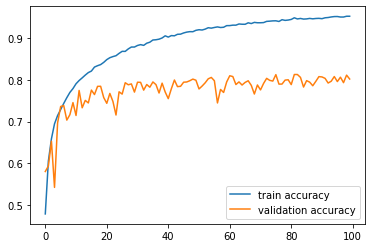

In [43]:
train_acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

plt.plot(np.arange(0,epochs),train_acc)
plt.plot(np.arange(0,epochs),val_acc)
plt.legend(['train accuracy','validation accuracy'])

comment: model is overfitting. 

###Save the model

In [44]:
import os
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'cifar10_trained_model_overfitted.h5')
model.save(model_path)

Try solving overfitting problems:

### Use Data Augmentation and retrain model, adding batch normalization layers, change bactch size to 64

In [23]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

y_train = utils.to_categorical(y_train, num_classes=10, dtype='float32')
y_test = utils.to_categorical(y_test, num_classes=10, dtype='float32')


X_train= X_train/255.0
X_test= X_test/255.0

In [24]:
X_train.shape

(50000, 32, 32, 3)

In [25]:
X_test.shape

(10000, 32, 32, 3)

In [26]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [58]:
tf.keras.backend.clear_session()

from keras.preprocessing.image import ImageDataGenerator
train_datagen= ImageDataGenerator(
                rotation_range=15,
                #width_shift_range=0.1,
                #height_shift_range=0.1,
                shear_range=0.1,
                horizontal_flip=True,
                fill_mode='nearest'
)

train_datagen.fit(X_train)

In [59]:
model_aug=Sequential()
model_aug.add(layers.Conv2D(filters=64,kernel_size=(3,3), activation='elu', padding="same",input_shape=(32,32,3)))
model_aug.add(layers.BatchNormalization())
model_aug.add(layers.MaxPooling2D(2,2))
model_aug.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation='elu',padding="same"))
model_aug.add(layers.BatchNormalization())
model_aug.add(layers.MaxPooling2D(2,2))
model_aug.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='elu',padding="same"))
model_aug.add(layers.BatchNormalization())
model_aug.add(layers.MaxPooling2D(2,2))
model_aug.add(layers.Dropout(0.5))

model_aug.add(layers.Flatten())
model_aug.add(layers.Dense(512,activation='relu'))
model_aug.add(layers.Dense(512,activation='relu'))
model_aug.add(layers.Dense(10,activation='softmax'))

model_aug.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          1

In [60]:
model_aug.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [61]:
epochs=100

In [62]:
history_aug=model_aug.fit_generator(train_datagen.flow(X_train, y_train, batch_size=64), 
                        steps_per_epoch=len(X_train)/64,
                        epochs=epochs,
                        validation_data=(X_test, y_test)
                        )

Epoch 1/100
782/781 [==============================] - 22s 29ms/step - loss: 1.4984 - accuracy: 0.4581 - val_loss: 1.3903 - val_accuracy: 0.5106
Epoch 2/100
782/781 [==============================] - 22s 28ms/step - loss: 1.1948 - accuracy: 0.5730 - val_loss: 1.5371 - val_accuracy: 0.4981
Epoch 3/100
782/781 [==============================] - 22s 28ms/step - loss: 1.0744 - accuracy: 0.6171 - val_loss: 1.0763 - val_accuracy: 0.6224
Epoch 4/100
782/781 [==============================] - 22s 28ms/step - loss: 0.9959 - accuracy: 0.6466 - val_loss: 0.9813 - val_accuracy: 0.6590
Epoch 5/100
782/781 [==============================] - 22s 28ms/step - loss: 0.9356 - accuracy: 0.6676 - val_loss: 0.8622 - val_accuracy: 0.6913
Epoch 6/100
782/781 [==============================] - 22s 28ms/step - loss: 0.8950 - accuracy: 0.6855 - val_loss: 0.9975 - val_accuracy: 0.6588
Epoch 7/100
782/781 [==============================] - 22s 28ms/step - loss: 0.8679 - accuracy: 0.6964 - val_loss: 0.7770 - val_ac

In [63]:
model_aug.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6453 - accuracy: 0.8149


[0.6453311443328857, 0.8148999810218811]

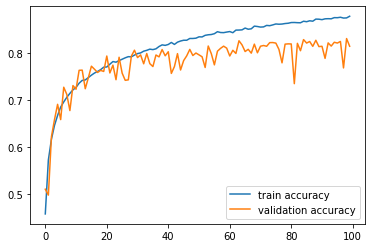

In [64]:
train_acc=history_aug.history['accuracy']
val_acc=history_aug.history['val_accuracy']

plt.plot(np.arange(0,epochs),train_acc)
plt.plot(np.arange(0,epochs),val_acc)
plt.legend(['train accuracy','validation accuracy'])

comment: still overfitting, slightly better with data augmentation

change image augmentation

In [27]:
tf.keras.backend.clear_session()

from keras.preprocessing.image import ImageDataGenerator
train_datagen= ImageDataGenerator(
                rotation_range=20,
                width_shift_range=0.1,
                height_shift_range=0.1,
                #shear_range=0.1,
                horizontal_flip=True,
                fill_mode='nearest'
)

train_datagen.fit(X_train)

model_aug=Sequential()
model_aug.add(layers.Conv2D(filters=64,kernel_size=(3,3), activation='elu', padding="same",input_shape=(32,32,3)))
model_aug.add(layers.BatchNormalization())
model_aug.add(layers.MaxPooling2D(2,2))
model_aug.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation='elu',padding="same"))
model_aug.add(layers.BatchNormalization())
model_aug.add(layers.MaxPooling2D(2,2))
model_aug.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='elu',padding="same"))
model_aug.add(layers.BatchNormalization())
model_aug.add(layers.MaxPooling2D(2,2))
model_aug.add(layers.Dropout(0.5))

model_aug.add(layers.Flatten())
model_aug.add(layers.Dense(512,activation='relu'))
#model_aug.add(layers.Dense(512,activation='relu'))
model_aug.add(layers.Dense(10,activation='softmax'))

model_aug.summary()
model_aug.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

epochs=100

history_aug=model_aug.fit_generator(train_datagen.flow(X_train, y_train, batch_size=64), 
                        steps_per_epoch=len(X_train)/64,
                        epochs=epochs,
                        validation_data=(X_test, y_test)
                        )

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          1

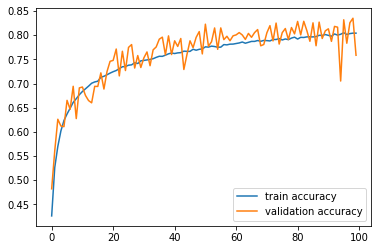

In [28]:
train_acc=history_aug.history['accuracy']
val_acc=history_aug.history['val_accuracy']

plt.plot(np.arange(0,epochs),train_acc)
plt.plot(np.arange(0,epochs),val_acc)
plt.legend(['train accuracy','validation accuracy'])

no overfitting, but accuracy overall are under expected. Validation accuracy fluctuates a lot.